- Title: Simpson's Paradox Homework Example
- Date: 2019-03-25

Here is a combination of some of the code Sam kindly showed us in class, plus the visualizations I showed you, for our simpson's paradox example on 3/25/19. 

Here are a few additional FYIs: 

1.  The source of the underlying dataset is an article entitled "[Simpson’s Paradox: A Data Set and Discrimination Case Study](http://jse.amstat.org/v22n1/mickel.pdf)" in the Journal of Statistics Education, Volume 22, Number 1 (2014) by Stanley A. Taylor and Amy E. Mickel

2.  Taylor and Mickel talk about pivot tables as a good solution for looking at these data in their article. That's a slightly more powerful version of some of the groupby code Sam showed us.  For a nice explanation of how to do pivot tables in Pandas, see [this web page](https://pbpython.com/pandas-pivot-table-explained.html)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import numpy as np
%matplotlib inline

SECRET_PASSWORD = "INSERT PASSWORD FOR CLASS SERVER HERE"
endpoint = "https://gobbledygook.herokuapp.com/data?file={}&password={}".format("mickel.csv", SECRET_PASSWORD)
df = pd.read_csv(endpoint)

In [2]:
df.head()

,ID,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13-17,17,Female,2113,White not Hispanic
1,10409,22-50,37,Male,41924,White not Hispanic
2,10486,0 - 5,3,Male,1454,Hispanic
3,10538,18-21,19,Female,6400,Hispanic
4,10568,13-17,13,Male,4412,White not Hispanic


In [3]:
# begin sam's code
df.Ethnicity.unique()

array(['White not Hispanic', 'Hispanic', 'Black', 'Multi Race', 'Asian',
       'American Indian', 'Other', 'Native Hawaiian'], dtype=object)

In [4]:
df.groupby("Ethnicity")["Expenditures"].mean()

Ethnicity
American Indian       36438.250000
Asian                 18392.372093
Black                 20884.593220
Hispanic              11065.569149
Multi Race             4456.730769
Native Hawaiian       42782.333333
Other                  3316.500000
White not Hispanic    24697.548628
Name: Expenditures, dtype: float64

In [5]:
df.groupby("Age Cohort")["Expenditures"].mean()

Age Cohort
 0 - 5     1415.280488
 51 +     53521.896226
13-17      3922.613208
18-21      9888.537688
22-50     40209.283186
6-12       2226.862857
Name: Expenditures, dtype: float64

In [6]:
df.groupby("Gender")["Expenditures"].mean()

Gender
Female    18129.606362
Male      18001.195171
Name: Expenditures, dtype: float64

In [7]:
df.groupby(["Age Cohort", "Ethnicity"])["Gender"].count()

Age Cohort  Ethnicity         
 0 - 5      Asian                   8
            Black                   3
            Hispanic               44
            Multi Race              7
            White not Hispanic     20
 51 +       American Indian         2
            Asian                  13
            Black                   7
            Hispanic               17
            Native Hawaiian         1
            White not Hispanic     66
13-17       American Indian         1
            Asian                  20
            Black                  12
            Hispanic              103
            Multi Race              7
            Other                   2
            White not Hispanic     67
18-21       Asian                  41
            Black                   9
            Hispanic               78
            Multi Race              2
            White not Hispanic     69
22-50       American Indian         1
            Asian                  29
            Black  

In [8]:
age_buckets = df.groupby(["Age Cohort"])["Gender"].count()
df.groupby(["Age Cohort", "Ethnicity"])["Gender"].count() / age_buckets * 100

Age Cohort  Ethnicity         
 0 - 5      Asian                  9.756098
            Black                  3.658537
            Hispanic              53.658537
            Multi Race             8.536585
            White not Hispanic    24.390244
 51 +       American Indian        1.886792
            Asian                 12.264151
            Black                  6.603774
            Hispanic              16.037736
            Native Hawaiian        0.943396
            White not Hispanic    62.264151
13-17       American Indian        0.471698
            Asian                  9.433962
            Black                  5.660377
            Hispanic              48.584906
            Multi Race             3.301887
            Other                  0.943396
            White not Hispanic    31.603774
18-21       Asian                 20.603015
            Black                  4.522613
            Hispanic              39.195980
            Multi Race             1.005025
 

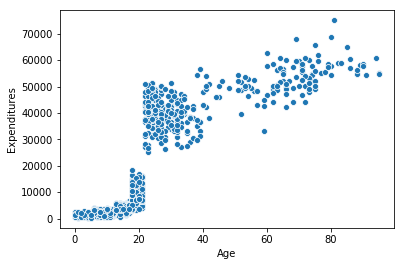

In [9]:
sns.scatterplot(df["Age"], df["Expenditures"])

In [10]:
mod = sm.ols(formula="Expenditures ~ Age", data=df)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Expenditures   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     2456.
Date:                Mon, 25 Mar 2019   Prob (F-statistic):          2.64e-271
Time:                        15:55:48   Log-Likelihood:                -10678.
No. Observations:                1000   AIC:                         2.136e+04
Df Residuals:                     998   BIC:                         2.137e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2285.6473    528.305     -4.326      0.0

In [11]:
mod = sm.ols(formula="Expenditures ~ Ethnicity", data=df)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Expenditures   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     18.94
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           7.89e-24
Time:                        15:56:03   Log-Likelihood:                -11236.
No. Observations:                1000   AIC:                         2.249e+04
Df Residuals:                     992   BIC:                         2.253e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [12]:
mod = sm.ols(formula="Expenditures ~ Ethnicity + Age + Gender", data=df)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Expenditures   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     288.3
Date:                Mon, 25 Mar 2019   Prob (F-statistic):          1.82e-269
Time:                        15:56:16   Log-Likelihood:                -10655.
No. Observations:                1000   AIC:                         2.133e+04
Df Residuals:                     990   BIC:                         2.138e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

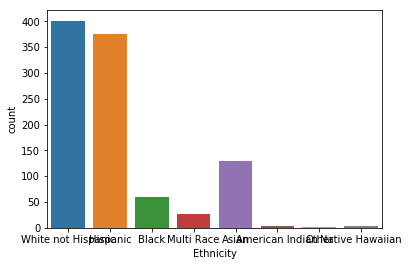

In [14]:
# gowder code (visualizations) begins here
sns.countplot(df["Ethnicity"])


In [15]:
def bin_ethnicity(eth):
    if eth == "White not Hispanic":
        return "white"
    elif eth == "Hispanic":
        return "hispanic"
    return "other"



# there is doubtless a better way to do this involving the apply function in pandas or something.  
# But I'm rusty with my Pandas data tranformations.

df["binned_eth"] =np.array([bin_ethnicity(x) for x in list(df["Ethnicity"])])

In [16]:
df.head()

,ID,Age Cohort,Age,Gender,Expenditures,Ethnicity,binned_eth
0,10210,13-17,17,Female,2113,White not Hispanic,white
1,10409,22-50,37,Male,41924,White not Hispanic,white
2,10486,0 - 5,3,Male,1454,Hispanic,hispanic
3,10538,18-21,19,Female,6400,Hispanic,hispanic
4,10568,13-17,13,Male,4412,White not Hispanic,white


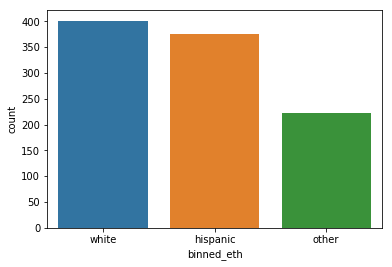

In [17]:
sns.countplot(df["binned_eth"])

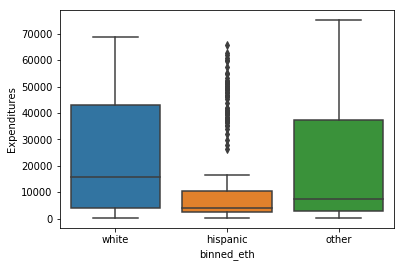

In [18]:
sns.boxplot(x=df["binned_eth"], y=df["Expenditures"])

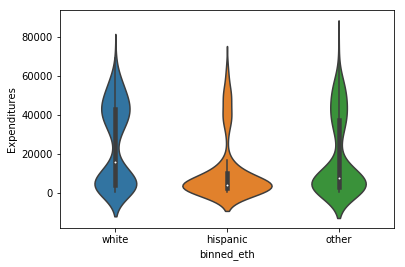

In [19]:
sns.violinplot(x=df["binned_eth"], y=df["Expenditures"])

In [21]:
cohorts = sorted(df["Age Cohort"].unique())  # just sorting this now like a sensible person

In [22]:
cohorts

[' 0 - 5', ' 51 +', '13-17', '18-21', '22-50', '6-12']

In [30]:
import matplotlib.pyplot as plt # this is a change from my code in class to make it work in a loop
def subsetted_violin(cohort):
    temp_df = df[df["Age Cohort"] == cohort]
    plt.figure()
    sns.violinplot(x=temp_df["binned_eth"], y=temp_df["Expenditures"])

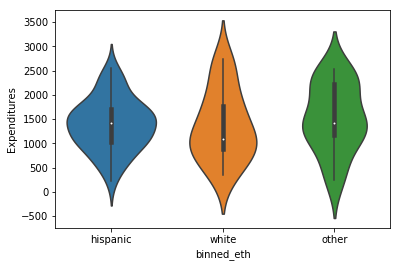

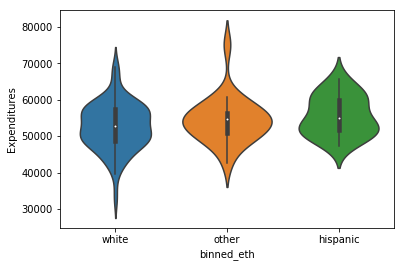

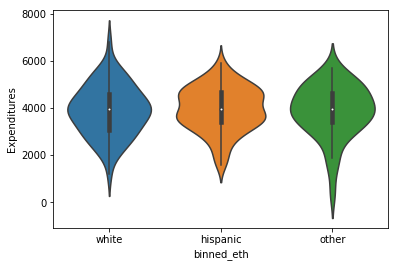

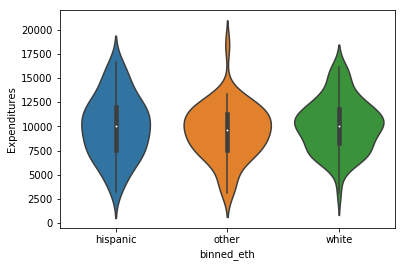

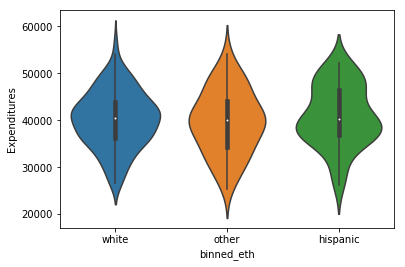

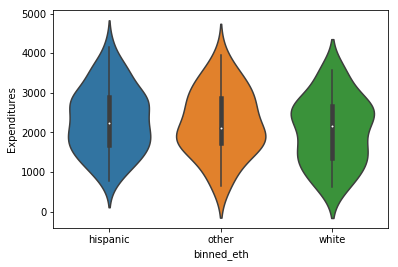

In [31]:
for cohort in cohorts:
    subsetted_violin(cohort)

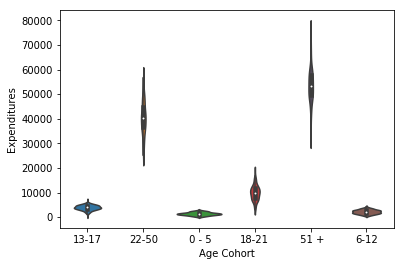

In [32]:
sns.violinplot(x=df["Age Cohort"], y=df["Expenditures"])